<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/66DaysOfData/blob/main/DataCleaningKaggleMiniCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handling Missing Values

In [ ]:
#Initial setup
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving NFL Play by Play 2009-2017 (v4).csv to NFL Play by Play 2009-2017 (v4).csv


In [ ]:
#Read in data
nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")

#set seed for reproducibility
np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Let's take a look at some of the data; this should always be the first thing you do when loading in a new dataset.

In [ ]:
#look at first five rows of data
#There is a handful of missing data we can see already 
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


Let's check how many missing data points there are

In [ ]:
#get number of missing data per column
missing_values_count = nfl_data.isnull().sum()

# Look at number of missing points in first ten columns
missing_values_count[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

There is a lot there. Let's look at the percentage of values that are missing data to understand the scale

In [ ]:
#how many total missing values?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

#percent of data missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.87214126835169


Now we need to understand why the data is missing. For this we have to look closer at the data we are working with. An important question to ask: Is the value missing because it wasn't recorded or because it doesn't exist?

If it is the latter, trying to guess what the value COULD have been is pointless because there isn't a value in the first place. In the case of the former, you can use some intuition and statistics to determine what the value COULD have been.

In [ ]:
#look at number of missing points in first ten columns
missing_values_count[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

A look through the data documentation is always helpful. For now we will practice some of the options we have with regards to removing NaN values.

In [ ]:
#remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [ ]:
# This removed all our data! Why? Because we have at least one NaN value in 
# every row of our dataset and dropna defaults to dropping rows. We need
# to specify that we want to drop all columns with NaN values by setting the
# axis=1
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [ ]:
# Let's see how much we lost
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


We can also fill in missing values instead of completely dropping them from the DataFrame.

In [ ]:
#get small subset of NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


Using fillna() we can fill in missing values. Let's start by filling the values with 0.

In [ ]:
#replace NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [ ]:
# Replace NA's with the value that comes directly after it in the same column
# Replace all remaining NA's with 0s
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


##Your Turn

In [ ]:
#Initial Setup
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving Building_Permits.csv to Building_Permits.csv


In [ ]:
# Read in data
sf_permits = pd.read_csv("Building_Permits.csv")

#Set seed for reproducibility
np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Use the code cell below to print the first five rows of the sf_permits DataFrame.

In [ ]:
sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


Does the dataset have any missing values? Once you have an answer, run the code cell below to get credit for your work

What percentage of the values in the dataset are missing? Your answer should be a number between 0 and 100. (If 1/4 of the values in the dataset are missing, the answer is 25.)

In [ ]:
sf_permits.shape

(198900, 43)

In [ ]:
total_cells = np.product(sf_permits.shape)
total_cells

8552700

In [ ]:
sf_permits.shape[0] * sf_permits.shape[1]

8552700

In [ ]:
total_nan = sf_permits.isnull().sum().sum()
total_nan

2245941

In [ ]:
percent_missing = (total_nan / total_cells) * 100
percent_missing

26.26002315058403

Look at the columns "Street Number Suffix" and "Zipcode" from the San Francisco Building Permits dataset. Both of these contain missing values.

Which, if either, are missing because they don't exist?
Which, if either, are missing because they weren't recorded?

In [ ]:
sf_permits["Street Number Suffix"].value_counts(dropna=False)

NaN    196684
A        1501
B         291
V         228
C          56
E          28
F          24
G          12
D          11
K          11
H          11
R          10
L          10
J           9
I           7
P           3
N           2
0           1
½           1
Name: Street Number Suffix, dtype: int64

In [ ]:
sf_permits["Zipcode"].value_counts(dropna=False)

94110.0    17837
94114.0    13404
94117.0    11780
94109.0    11348
94103.0    10986
94115.0    10095
94118.0     9812
94123.0     9515
94122.0     8886
94105.0     8628
94112.0     7897
94121.0     7773
94107.0     7706
94131.0     7664
94133.0     7424
94102.0     7164
94116.0     6421
94111.0     5385
94108.0     5320
94124.0     5265
94127.0     4993
94104.0     4229
94132.0     3507
94134.0     2983
NaN         1716
94158.0     1058
94130.0       81
94129.0       23
Name: Zipcode, dtype: int64

Looking at the information that we have, it is likely that any NaN values that appear in the "Street Number Suffix" column are there because they do not exist, and any NaN values that appear in the "Zipcode" column are there because they were forgotten or not recorded.

If you removed all of the rows of sf_permits with missing values, how many rows are left?

Note: Do not change the value of sf_permits when checking this

In [ ]:
sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


Removing all rows that have missing values removes all rows that we have, leaving us with an empty Dataset. This is because there is an NaN value in every row of the dataset. Obviously dropping NaN values by row isn't an option.

Now try removing all the columns with empty values.

Create a new DataFrame called sf_permits_with_na_dropped that has all of the columns with empty values removed.
How many columns were removed from the original sf_permits DataFrame? Use this number to set the value of the dropped_columns variable below.

In [ ]:
sf_permits_with_na_dropped = sf_permits.dropna(axis=1)
sf_permits_with_na_dropped.shape

(198900, 12)

In [ ]:
sf_permits.shape

(198900, 43)

In [ ]:
dropped_columns = sf_permits.shape[1] - sf_permits_with_na_dropped.shape[1]
dropped_columns

31

Try replacing all the NaN's in the sf_permits data with the one that comes directly after it and then replacing any remaining NaN's with 0. Set the result to a new DataFrame sf_permits_with_na_imputed.

In [ ]:
sf_permits_with_na_imputed = sf_permits.fillna(method="bfill", axis=0).fillna(0)
sf_permits_with_na_imputed

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


#Scaling and Normalization

In [1]:
#Initial Setup
import pandas as pd
import numpy as np

# For Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

#Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

Scaling: Changes the range of data

Normalization: Changing the shape of the distribution of data

###Scaling

Data transformed to fit within a specific scale (0-100 or 0-1 for instance). 

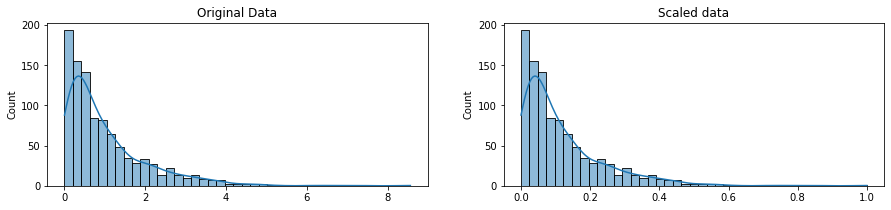

In [2]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

The shape of the data doesn't change, simply the range

###Normalization

Normalization changes the observations so they can be described as normal distribution. This is important when using machine learning or statstics that assumes the data is normally distributed. 

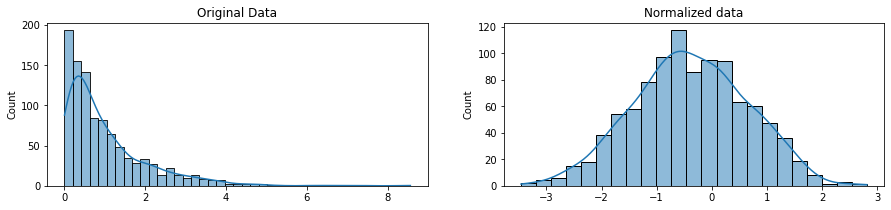

In [3]:
# Normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

#plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()